# 기상자료 활용하기

In [145]:
import pandas as pd

## 기상자료 다운받기

In [146]:
# API 이용하기
year_s = 2000
year_e = 2000
station_code = 146
url = f"https://api.taegon.kr/stations/{station_code}/?sy={year_s}&ey={year_e}&format=csv"

In [147]:
# 데이터 프레임 만들기
df = pd.read_csv(url)
df.head()

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud
0,2000,1,1,12.0,5.9,1.1,63.6,0.2,1.5,0.0,0.0,4.5
1,2000,1,2,10.9,6.9,2.4,77.5,1.7,0.2,0.7,0.0,5.6
2,2000,1,3,4.7,1.3,-1.9,68.9,0.9,7.7,0.0,0.0,2.0
3,2000,1,4,9.0,2.6,-4.0,59.9,0.5,6.7,0.0,0.0,2.0
4,2000,1,5,14.2,10.5,7.3,61.0,2.6,0.3,9.5,0.0,9.8


In [148]:
df.columns

Index(['year', ' month', ' day', ' tmax', ' tavg', ' tmin', ' humid', ' wind',
       ' sunshine', ' rainfall', ' snow', ' cloud'],
      dtype='object')

In [149]:
df.columns = [c.strip() for c in df]

In [150]:
# 연평균 기온
df['tavg'].mean()

13.618032786885236

In [151]:
# 총 강수량
df['rainfall'].sum()

1636.7

In [152]:
# 연간 최고기온
df['tmax'].max()

34.9

In [153]:
# 연내 최저기온
df['tmin'].min()

-11.0

In [154]:
# 일교차
df['일교차']=df['tmax']-df['tmin']
df.head()

,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud,일교차
0,2000,1,1,12.0,5.9,1.1,63.6,0.2,1.5,0.0,0.0,4.5,10.9
1,2000,1,2,10.9,6.9,2.4,77.5,1.7,0.2,0.7,0.0,5.6,8.5
2,2000,1,3,4.7,1.3,-1.9,68.9,0.9,7.7,0.0,0.0,2.0,6.6
3,2000,1,4,9.0,2.6,-4.0,59.9,0.5,6.7,0.0,0.0,2.0,13.0
4,2000,1,5,14.2,10.5,7.3,61.0,2.6,0.3,9.5,0.0,9.8,6.9


In [155]:
# 적산온도
# http://www.newsam.co.kr/news/article.html?no=33537
# https://ko.wikipedia.org/wiki/%EC%A0%81%EC%82%B0%EC%98%A8%EB%8F%84

# len(df['tavg']>=15)
# print(df['tavg']>=15)
# (df['tavg']>15).sum()

df['유효온도'] = df['tavg'].apply(lambda x:x-15 if x>=15 else 0)
df['적산온도'] = df['유효온도'].cumsum()
df[(df["month"]==8)&(df["day"]==31)]

cum_temp = []
sum = 0
for x in df["tavg"]:
  if x>15:
    x=x-15
  else:
    x=0
  sum += x
  cum_temp.append(sum)
df['적산온도_for'] = cum_temp
df[(df["month"]==8)&(df["day"]==31)]


,year,month,day,tmax,tavg,tmin,humid,wind,sunshine,rainfall,snow,cloud,일교차,유효온도,적산온도,적산온도_for
243,2000,8,31,29.1,27.5,25.5,72.5,4.8,0.0,36.9,0.0,9.8,3.6,12.5,1085.4,1085.4


## 여러지역 기상자료 다루기

In [156]:
# 지역별 기상자료 구하기
stations = {
    "경기도": 119,    # 수원
    "강원도": 101,    # 춘천
    "충청북도": 131,  # 청주
    "충청남도": 129,  # 서산
    "전라북도": 146,  # 전주
    "전라남도": 156,  # 광주
    "경상북도": 143,  # 대구
    "경상남도": 155,  # 창원
    "제주도": 184,    # 제주
}

In [157]:
# 자료 다운로드 받기
year = 2000

df_all = None
weather_mean = {}
for station_name, station_code in stations.items():
  url = f"https://api.taegon.kr/stations/{station_code}/?sy={year}&ey={year}&format=csv"
  df = pd.read_csv(url)
  # 컬럼명 확인하고, 공백없애기
  df.columns = [c.strip() for c in df]
  
  df["station_name"] = station_name
  df["station_code"] = station_code
  # TODO: 각 지역별로 읽은 데이터프레임을 하나로 합치기
  if df_all is None:
    df_all = df
  else : 
    df_all=pd.concat([df_all, df], ignore_index=True)  
# print(df_all)
# 연도별 평균 저장하기
  weather_mean[station_name] = df['tavg'].mean()
print(weather_mean)
  # weather_mean = ??


{'경기도': 12.32049180327868, '강원도': 11.104098360655739, '충청북도': 12.376502732240436, '충청남도': 11.319945355191267, '전라북도': 13.618032786885236, '전라남도': 13.545628415300541, '경상북도': 14.287431693989081, '경상남도': 14.686338797814212, '제주도': 15.690163934426225}


In [158]:
# 합쳐진 데이터 프레임에서 각 지역별 값이 정상적으로 출력되는지 확인
# for station_name, station_code in stations.items():
#   # pass
# # print(df_all.groupby("station_name")['tavg'].mean())
print(df_all.groupby('station_name')['tavg'].mean())
# df_all 데이터프레임에서 원하는 값 찾아서 출력하기


station_name
강원도     11.104098
경기도     12.320492
경상남도    14.686339
경상북도    14.287432
전라남도    13.545628
전라북도    13.618033
제주도     15.690164
충청남도    11.319945
충청북도    12.376503
Name: tavg, dtype: float64


## 사과재배적지
http://weather.rda.go.kr/w/appMap/ftrAppleHelp.do?kind=


연평균기온

* 적지: 7.5 <= X < 11.5
* 가능지: 6.5 ~ 7.5, 11.5 ~ 12.5
* 부적지 & 저위생산지: X < 6.5, 12.5 < X

## 지도파일 다운받기

https://neurowhai.tistory.com/350

In [159]:
!pip install leafmap


  Using cached leafmap-0.12.1-py2.py3-none-any.whl (177 kB)
  Using cached ipyfilechooser-0.6.0-py3-none-any.whl (11 kB)
  Using cached whiteboxgui-2.2.0-py2.py3-none-any.whl (99 kB)
  Using cached folium-0.13.0-py2.py3-none-any.whl (96 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Using cached ipyleaflet-0.17.2-py3-none-any.whl (3.7 MB)
  Using cached python_box-6.1.0-cp39-cp39-win_amd64.whl (972 kB)
  Using cached geojson-2.5.0-py2.py3-none-any.whl (14 kB)
  Using cached ipysheet-0.6.0-py2.py3-none-any.whl (3.8 MB)
  Using cached bqplot-0.12.36-py2.py3-none-any.whl (1.2 MB)
  Using cached scooby-0.7.0-py3-none-any.whl (16 kB)
  Using cached xyzservices-2022.9.0-py3-none-any.whl (55 kB)
  Using cached ipyevents-2.0.1-py2.py3-none-any.whl (130 kB)
  Using cached gdown-4.5.3-py3-none-any.whl
  Using cached PyCRS-1.0.2-py3-none-any.whl
  Using cached pystac_client-0.5.1-py3-none-any.whl (29 kB)
  Using cached branca

In [160]:
import ipyleaflet
import json
from ipyleaflet import Map, GeoJSON

In [161]:
weather_mean

{'경기도': 12.32049180327868,
 '강원도': 11.104098360655739,
 '충청북도': 12.376502732240436,
 '충청남도': 11.319945355191267,
 '전라북도': 13.618032786885236,
 '전라남도': 13.545628415300541,
 '경상북도': 14.287431693989081,
 '경상남도': 14.686338797814212,
 '제주도': 15.690163934426225}

In [162]:
with open('TL_SCCO_CTPRVN.json', 'r') as f:
    data = json.load(f)

def random_color(feature):
    if feature['properties']["CTP_KOR_NM"] in weather_mean:
      tavg = weather_mean[feature['properties']["CTP_KOR_NM"]]
      if 7.5 <= tavg < 11.5:
        return  {
          'color': 'black',
          'fillColor': 'green',
        }
      elif 6.5 <= tavg < 7:
        return  {
          'color': 'black',
          'fillColor': 'orange',
        }
      elif 11.5 <= tavg < 12.5:
        return  {
          'color': 'black',
          'fillColor': 'orange',
        }
        
    return {
        'color': 'black',
        'fillColor': 'red',
    }

m = Map(center=(36, 127.5), zoom=6)

geo_json = GeoJSON(
    data=data,
    style={
        'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.3, 'weight': 1
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    style_callback=random_color
)
m.add_layer(geo_json)
m

FileNotFoundError: [Errno 2] No such file or directory: 'TL_SCCO_CTPRVN.json'

# 전라북도 시군구 지도만들기 (과제)

* 고령화[aging, population aging]: 평균수명의 증가에 따라 총인구 중에 차지하는 고령자(노인)의 인구비율이 점차로 많아지는 현상 또는 높은 상태.
  * 고령화사회(ageing society):총인구 중 65세 이상 인구가 차지하는 비율이 7% 이상
  *고령사회(aged society):총인구 중 65세 이상 인구가 차지하는 비율이 14% 이상
  *초고령사회 혹은 후기고령사회(post-aged society): 총인구 중 65세 이상 인구가 차지하는 비율이 20% 이상

7주차 강의자료를 참고하여, 지도를 완성하시오.
https://colab.research.google.com/drive/1PJP2vYh3ifSTD-utb0Hp4uIlLtczNeXI#scrollTo=VMqgL-hk9mU_


In [ ]:
# 데이터 다운로드 받기
# https://jumin.mois.go.kr/index.jsp#
# 아래 화면과 같이 설정하고, "csv 파일 다운로드" 버튼으로 자료 구득

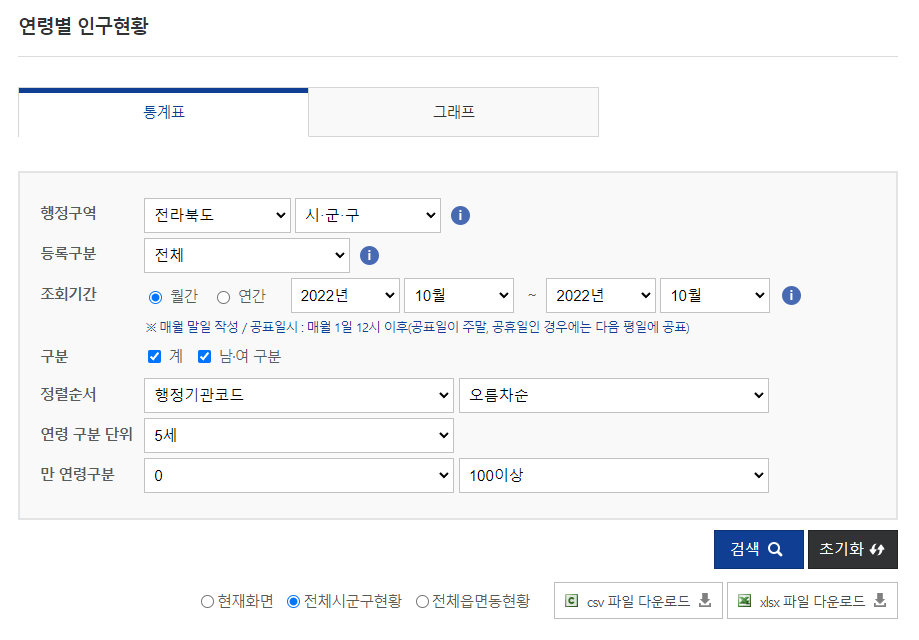

In [163]:
import pandas as pd
# 데이터 불러오기
df = pd.read_csv("202210_202210_연령별인구현황_월간.csv", encoding='cp949', thousands = ',')
df.head()

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_55~59세,2022년10월_여_60~64세,2022년10월_여_65~69세,2022년10월_여_70~74세,2022년10월_여_75~79세,2022년10월_여_80~84세,2022년10월_여_85~89세,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상
0,서울특별시 (1100000000),9443722,9443722,230113,321436,363830,387057,586313,813585,753243,...,352536,374791,306812,220053,168528,125384,65015,25029,6074,1020
1,서울특별시 종로구 (1111000000),141861,141861,2548,3967,4779,5370,9727,12790,10530,...,5754,5562,4473,3330,2967,2497,1300,494,119,20
2,서울특별시 중구 (1114000000),120648,120648,2796,3194,2978,3392,7083,10659,10706,...,4579,4891,4091,2996,2590,2128,1207,482,116,20
3,서울특별시 용산구 (1117000000),219102,219102,5536,6568,6755,7576,12698,19363,20431,...,8248,8267,6580,4709,3995,3470,1959,770,173,35
4,서울특별시 성동구 (1120000000),281694,281694,8717,9640,8747,9871,18089,24418,23196,...,10673,10891,8563,6042,5084,3919,2034,690,159,29


In [164]:
df.columns

Index(['행정구역', '2022년10월_계_총인구수', '2022년10월_계_연령구간인구수', '2022년10월_계_0~4세',
       '2022년10월_계_5~9세', '2022년10월_계_10~14세', '2022년10월_계_15~19세',
       '2022년10월_계_20~24세', '2022년10월_계_25~29세', '2022년10월_계_30~34세',
       '2022년10월_계_35~39세', '2022년10월_계_40~44세', '2022년10월_계_45~49세',
       '2022년10월_계_50~54세', '2022년10월_계_55~59세', '2022년10월_계_60~64세',
       '2022년10월_계_65~69세', '2022년10월_계_70~74세', '2022년10월_계_75~79세',
       '2022년10월_계_80~84세', '2022년10월_계_85~89세', '2022년10월_계_90~94세',
       '2022년10월_계_95~99세', '2022년10월_계_100세 이상', '2022년10월_남_총인구수',
       '2022년10월_남_연령구간인구수', '2022년10월_남_0~4세', '2022년10월_남_5~9세',
       '2022년10월_남_10~14세', '2022년10월_남_15~19세', '2022년10월_남_20~24세',
       '2022년10월_남_25~29세', '2022년10월_남_30~34세', '2022년10월_남_35~39세',
       '2022년10월_남_40~44세', '2022년10월_남_45~49세', '2022년10월_남_50~54세',
       '2022년10월_남_55~59세', '2022년10월_남_60~64세', '2022년10월_남_65~69세',
       '2022년10월_남_70~74세', '2022년10월_남_75~79세', '2022년10월_남_80~84세',
       '2022년10월_남_85

In [165]:
# 65세 이상 인구 비율 구하기
df.loc[:, '2022년10월_계_총인구수':'2022년10월_계_100세 이상'].astype(int)
df['계_65세이상']=df['2022년10월_계_65~69세']+df['2022년10월_계_70~74세']+df['2022년10월_계_75~79세']+df['2022년10월_계_80~84세']+df['2022년10월_계_85~89세']+df['2022년10월_계_90~94세']+df['2022년10월_계_95~99세']+df['2022년10월_계_100세 이상']
# print(df['계_65세이상'])
df

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_60~64세,2022년10월_여_65~69세,2022년10월_여_70~74세,2022년10월_여_75~79세,2022년10월_여_80~84세,2022년10월_여_85~89세,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상,계_65세이상
0,서울특별시 (1100000000),9443722,9443722,230113,321436,363830,387057,586313,813585,753243,...,374791,306812,220053,168528,125384,65015,25029,6074,1020,1647613
1,서울특별시 종로구 (1111000000),141861,141861,2548,3967,4779,5370,9727,12790,10530,...,5562,4473,3330,2967,2497,1300,494,119,20,27582
2,서울특별시 중구 (1114000000),120648,120648,2796,3194,2978,3392,7083,10659,10706,...,4891,4091,2996,2590,2128,1207,482,116,20,24512
3,서울특별시 용산구 (1117000000),219102,219102,5536,6568,6755,7576,12698,19363,20431,...,8267,6580,4709,3995,3470,1959,770,173,35,38326
4,서울특별시 성동구 (1120000000),281694,281694,8717,9640,8747,9871,18089,24418,23196,...,10891,8563,6042,5084,3919,2034,690,159,29,47315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,경상남도 거창군 (4888000000),60475,60475,1224,2035,2629,3113,2949,2466,2017,...,3090,2492,2126,1846,2164,1399,526,107,23,17949
289,경상남도 합천군 (4889000000),42245,42245,556,795,1072,1143,1324,1259,979,...,2542,2146,2000,1891,2375,1574,524,111,17,17708
290,제주특별자치도 (5000000000),678324,678324,21810,33719,36604,34082,37558,40710,37500,...,25264,19136,13704,11584,10163,6841,2967,742,205,115020
291,제주특별자치도 제주시 (5011000000),493459,493459,16610,25063,27118,25863,28790,31348,28883,...,17654,13104,9169,7744,6577,4445,1992,521,137,76821


In [166]:
df = df.fillna(0)
df.isnull().sum()

행정구역                  0
2022년10월_계_총인구수       0
2022년10월_계_연령구간인구수    0
2022년10월_계_0~4세       0
2022년10월_계_5~9세       0
                     ..
2022년10월_여_85~89세     0
2022년10월_여_90~94세     0
2022년10월_여_95~99세     0
2022년10월_여_100세 이상    0
계_65세이상               0
Length: 71, dtype: int64

In [167]:
df['유아']=df['2022년10월_계_0~4세']+df['2022년10월_계_5~9세']
df['10대']=df['2022년10월_계_10~14세']+df['2022년10월_계_15~19세']
df['20대']=df['2022년10월_계_20~24세']+df['2022년10월_계_25~29세']
df['30대']=df['2022년10월_계_30~34세']+df['2022년10월_계_35~39세']
df['40대']=df['2022년10월_계_40~44세']+df['2022년10월_계_45~49세']
df['50~65세']=df['2022년10월_계_50~54세']+df['2022년10월_계_55~59세']+df['2022년10월_계_60~64세']
df.head()

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상,계_65세이상,유아,10대,20대,30대,40대,50~65세
0,서울특별시 (1100000000),9443722,9443722,230113,321436,363830,387057,586313,813585,753243,...,25029,6074,1020,1647613,551549,750887,1399898,1426203,1455582,2211990
1,서울특별시 종로구 (1111000000),141861,141861,2548,3967,4779,5370,9727,12790,10530,...,494,119,20,27582,6515,10149,22517,19359,20155,35584
2,서울특별시 중구 (1114000000),120648,120648,2796,3194,2978,3392,7083,10659,10706,...,482,116,20,24512,5990,6370,17742,19863,16860,29311
3,서울특별시 용산구 (1117000000),219102,219102,5536,6568,6755,7576,12698,19363,20431,...,770,173,35,38326,12104,14331,32061,37921,32712,51647
4,서울특별시 성동구 (1120000000),281694,281694,8717,9640,8747,9871,18089,24418,23196,...,690,159,29,47315,18357,18618,42507,45698,42397,66802


In [168]:
df['65세이상_비율(%)']=round(df['계_65세이상']/df['2022년10월_계_총인구수']*100,1)
# df=df.drop(['65세이상_비율'], axis=1)
df['유아_비율(%)']=round(df['유아']/df['2022년10월_계_총인구수']*100,1)
df['10대_비율(%)']=round(df['10대']/df['2022년10월_계_총인구수']*100,1)
df['20대_비율(%)']=round(df['20대']/df['2022년10월_계_총인구수']*100,1)
df['30대_비율(%)']=round(df['30대']/df['2022년10월_계_총인구수']*100,1)
df['40대_비율(%)']=round(df['40대']/df['2022년10월_계_총인구수']*100,1)
df['50~65세_비율(%)']=round(df['50~65세']/df['2022년10월_계_총인구수']*100,1)

df

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,30대,40대,50~65세,65세이상_비율(%),유아_비율(%),10대_비율(%),20대_비율(%),30대_비율(%),40대_비율(%),50~65세_비율(%)
0,서울특별시 (1100000000),9443722,9443722,230113,321436,363830,387057,586313,813585,753243,...,1426203,1455582,2211990,17.4,5.8,8.0,14.8,15.1,15.4,23.4
1,서울특별시 종로구 (1111000000),141861,141861,2548,3967,4779,5370,9727,12790,10530,...,19359,20155,35584,19.4,4.6,7.2,15.9,13.6,14.2,25.1
2,서울특별시 중구 (1114000000),120648,120648,2796,3194,2978,3392,7083,10659,10706,...,19863,16860,29311,20.3,5.0,5.3,14.7,16.5,14.0,24.3
3,서울특별시 용산구 (1117000000),219102,219102,5536,6568,6755,7576,12698,19363,20431,...,37921,32712,51647,17.5,5.5,6.5,14.6,17.3,14.9,23.6
4,서울특별시 성동구 (1120000000),281694,281694,8717,9640,8747,9871,18089,24418,23196,...,45698,42397,66802,16.8,6.5,6.6,15.1,16.2,15.1,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,경상남도 거창군 (4888000000),60475,60475,1224,2035,2629,3113,2949,2466,2017,...,4576,7258,16276,29.7,5.4,9.5,9.0,7.6,12.0,26.9
289,경상남도 합천군 (4889000000),42245,42245,556,795,1072,1143,1324,1259,979,...,2210,3822,12356,41.9,3.2,5.2,6.1,5.2,9.0,29.2
290,제주특별자치도 (5000000000),678324,678324,21810,33719,36604,34082,37558,40710,37500,...,79754,111197,167870,17.0,8.2,10.4,11.5,11.8,16.4,24.7
291,제주특별자치도 제주시 (5011000000),493459,493459,16610,25063,27118,25863,28790,31348,28883,...,60721,81623,119502,15.6,8.4,10.7,12.2,12.3,16.5,24.2


In [177]:
df['행정구역']=df['행정구역'].str.split('(').str[0]
# df.head()
# if '전라북도' in df['행정구역']:
#     df1 = df[:, '행정구역']
#     print(df1.head())

dfjb=df[df['행정구역'].str.contains('전라북도')]
dfjb['행정구역']

195            전라북도  
196         전라북도 전주시 
197     전라북도 전주시 완산구 
198     전라북도 전주시 덕진구 
199    전라북도 전주시효자출장소 
200         전라북도 군산시 
201         전라북도 익산시 
202    전라북도 익산시함열출장소 
203         전라북도 정읍시 
204         전라북도 남원시 
205         전라북도 김제시 
206         전라북도 완주군 
207         전라북도 진안군 
208         전라북도 무주군 
209         전라북도 장수군 
210         전라북도 임실군 
211         전라북도 순창군 
212         전라북도 고창군 
213         전라북도 부안군 
Name: 행정구역, dtype: object

In [ ]:
# 비율에 따라 지도 그리기
!sudo apt-get install -y fonts-nanum

In [174]:
import matplotlib as mpl
import geopandas as gpd
import matplotlib.pyplot as plt

gpd.__version__

'0.12.1'

In [178]:
jb = gpd.read_file("TL_KODIS_BAS_JB.zip", encoding='euckr')

jb['KOR_NM']=jb['CTP_KOR_NM']+str(" ")+jb['SIG_KOR_NM']+str(" ")
jb

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry,KOR_NM
0,2.853812,54803,4511000191,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((958934.777 1763357.239, 958941.598 1...",전라북도 전주시
1,0.150989,55019,4511000022,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((969600.080 1759445.882, 969583.928 1...",전라북도 전주시
2,0.183129,55023,4511000023,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((970713.182 1759260.656, 970678.087 1...",전라북도 전주시
3,0.116598,55022,4511000024,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((970577.760 1759626.321, 970578.494 1...",전라북도 전주시
4,0.180809,55048,4511000069,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,"POLYGON ((966758.029 1757214.422, 966761.021 1...",전라북도 전주시
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1.004601,56326,4580000015,전라북도,None,None,20121221,None,45800,부안군,"POLYGON ((925704.279 1733425.513, 925715.523 1...",전라북도 부안군
1554,2.763326,56346,4580000011,전라북도,None,None,20121221,None,45800,부안군,"POLYGON ((920655.636 1733967.747, 920665.734 1...",전라북도 부안군
1555,5.010485,56301,4580000043,전라북도,None,None,20121221,None,45800,부안군,"POLYGON ((927785.037 1752450.716, 927820.582 1...",전라북도 부안군
1556,0.595634,56310,4580000036,전라북도,None,None,20121221,None,45800,부안군,"POLYGON ((930472.516 1748476.945, 930457.495 1...",전라북도 부안군


In [194]:
set(dfjb['행정구역'].unique()) - set(jb['KOR_NM'].unique())
jb1 = pd.merge(jb, dfjb, how='right', left_on='KOR_NM', right_on='행정구역')
# jb1= jb1.drop([0], axis=0)
# jb1.isnull().sum()
jb1

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,...,30대,40대,50~65세,65세이상_비율(%),유아_비율(%),10대_비율(%),20대_비율(%),30대_비율(%),40대_비율(%),50~65세_비율(%)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177081,254863,452002,23.1,6.3,9.5,11.3,10.0,14.4,25.5
1,2.853812,54803,4511000191,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,...,79460,103430,155659,16.3,7.4,10.6,13.8,12.2,15.8,23.8
2,0.150989,55019,4511000022,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,...,79460,103430,155659,16.3,7.4,10.6,13.8,12.2,15.8,23.8
3,0.183129,55023,4511000023,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,...,79460,103430,155659,16.3,7.4,10.6,13.8,12.2,15.8,23.8
4,0.116598,55022,4511000024,전라북도,20121221,국가기초구역 최초생성,20121221,20121221000000,45110,전주시,...,79460,103430,155659,16.3,7.4,10.6,13.8,12.2,15.8,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1.004601,56326,4580000015,전라북도,None,None,20121221,None,45800,부안군,...,3454,5643,13853,35.6,4.3,6.8,7.5,6.9,11.2,27.6
1559,2.763326,56346,4580000011,전라북도,None,None,20121221,None,45800,부안군,...,3454,5643,13853,35.6,4.3,6.8,7.5,6.9,11.2,27.6
1560,5.010485,56301,4580000043,전라북도,None,None,20121221,None,45800,부안군,...,3454,5643,13853,35.6,4.3,6.8,7.5,6.9,11.2,27.6
1561,0.595634,56310,4580000036,전라북도,None,None,20121221,None,45800,부안군,...,3454,5643,13853,35.6,4.3,6.8,7.5,6.9,11.2,27.6


In [ ]:
ax = jb.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("Jeonbuk Area Map")
ax.set_axis_off()
plt.show()


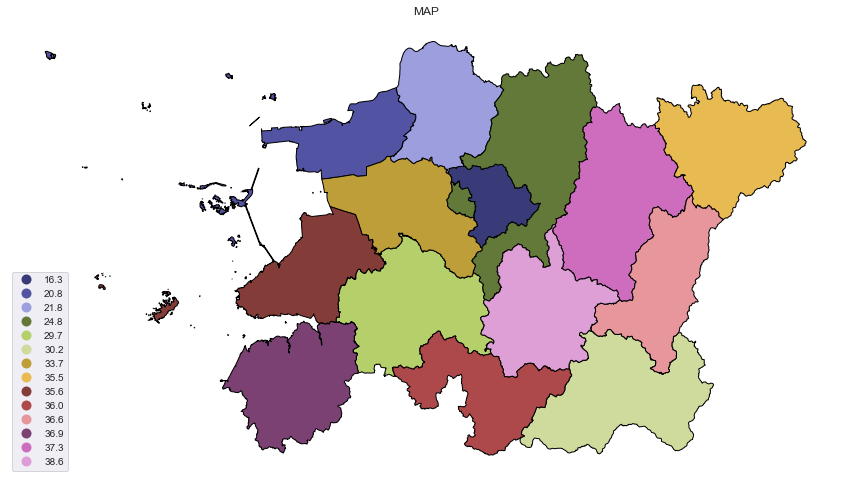

In [198]:
# print(jb1)
jb1.geometry = jb1.buffer(0.1)
jb1= jb1.dissolve(by='SIG_CD')
jb1
ax = jb1.plot(figsize=(15, 15), column="65세이상_비율(%)", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})

ax.set_title("MAP")
ax.set_axis_off()
plt.show()

## 읍면동 자료 받기

 - 위 그림에서 "전체읍면동현황" 선택 후, 데이터 분석

In [212]:
# 읍면동별 자료 받기
df1= pd.read_csv('202210_202210_연령별인구현황_월간 (1).csv', encoding='cp949', thousands = ',')
df1.head()

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_55~59세,2022년10월_여_60~64세,2022년10월_여_65~69세,2022년10월_여_70~74세,2022년10월_여_75~79세,2022년10월_여_80~84세,2022년10월_여_85~89세,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상
0,서울특별시 (1100000000),9443722,9443722,230113,321436,363830,387057,586313,813585,753243,...,352536,374791,306812,220053,168528,125384,65015,25029,6074,1020
1,서울특별시 종로구 (1111000000),141861,141861,2548,3967,4779,5370,9727,12790,10530,...,5754,5562,4473,3330,2967,2497,1300,494,119,20
2,서울특별시 종로구 청운효자동(1111051500),11700,11700,242,442,559,573,665,799,793,...,478,414,344,282,273,208,102,40,7,2
3,서울특별시 종로구 사직동(1111053000),9128,9128,186,335,332,335,425,691,752,...,370,377,260,222,187,182,102,39,12,0
4,서울특별시 종로구 삼청동(1111054000),2343,2343,27,61,86,83,122,161,159,...,90,109,98,67,59,57,40,11,0,1


In [214]:
# 65세 이상 인구비율 구하기
df1['행정구역']=df1['행정구역'].str.split('(').str[0]

df1=df1[df1['행정구역'].str.contains('전라북도')]
df1

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_55~59세,2022년10월_여_60~64세,2022년10월_여_65~69세,2022년10월_여_70~74세,2022년10월_여_75~79세,2022년10월_여_80~84세,2022년10월_여_85~89세,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상
2510,전라북도,1771776,1771776,42717,69018,82676,85040,101878,97865,84884,...,69220,76920,61376,50697,41692,41883,25622,9909,2138,389
2511,전라북도 전주시,652695,652695,18350,29925,34510,34909,44638,45135,39130,...,25265,25034,18697,14408,10617,9076,5182,2014,419,87
2512,전라북도 전주시 완산구,333820,333820,8184,13624,16246,17620,23476,23721,19595,...,13835,13833,10337,7877,5760,4863,2841,1131,249,57
2513,전라북도 전주시 완산구 중앙동,9543,9543,264,314,332,306,423,580,737,...,352,464,395,316,247,192,122,52,9,3
2514,전라북도 전주시 완산구 풍남동,3908,3908,44,58,60,77,132,193,209,...,171,219,243,165,193,131,77,32,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,전라북도 부안군 백산면,2418,2418,12,21,28,46,82,57,50,...,73,145,121,135,149,158,121,39,7,0
2768,전라북도 부안군 상서면,2127,2127,23,31,27,42,62,64,60,...,96,114,101,114,105,122,94,28,5,1
2769,전라북도 부안군 하서면,2557,2557,20,33,42,58,74,68,71,...,93,129,145,144,132,165,89,34,4,4
2770,전라북도 부안군 줄포면,2472,2472,16,41,53,47,75,67,49,...,106,174,133,141,123,117,80,40,9,0


In [224]:
df1.loc[:, '2022년10월_계_총인구수':'2022년10월_계_100세 이상'].astype(int)
df1['계_65세이상']=df1['2022년10월_계_65~69세']+df1['2022년10월_계_70~74세']+df1['2022년10월_계_75~79세']+df1['2022년10월_계_80~84세']+df1['2022년10월_계_85~89세']+df1['2022년10월_계_90~94세']+df1['2022년10월_계_95~99세']+df1['2022년10월_계_100세 이상']
df1['65세이상_비율(%)']=round(df1['계_65세이상']/df1['2022년10월_계_총인구수']*100, 1)
df1

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_70~74세,2022년10월_여_75~79세,2022년10월_여_80~84세,2022년10월_여_85~89세,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상,계_65세이상,65세이상_비율(%),사회분류
2510,전라북도,1771776,1771776,42717,69018,82676,85040,101878,97865,84884,...,50697,41692,41883,25622,9909,2138,389,408636,23.1,초고령사회
2511,전라북도 전주시,652695,652695,18350,29925,34510,34909,44638,45135,39130,...,14408,10617,9076,5182,2014,419,87,106679,16.3,고령사회
2512,전라북도 전주시 완산구,333820,333820,8184,13624,16246,17620,23476,23721,19595,...,7877,5760,4863,2841,1131,249,57,58256,17.5,고령사회
2513,전라북도 전주시 완산구 중앙동,9543,9543,264,314,332,306,423,580,737,...,316,247,192,122,52,9,3,2405,25.2,초고령사회
2514,전라북도 전주시 완산구 풍남동,3908,3908,44,58,60,77,132,193,209,...,165,193,131,77,32,9,2,1476,37.8,초고령사회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,전라북도 부안군 백산면,2418,2418,12,21,28,46,82,57,50,...,135,149,158,121,39,7,0,1206,49.9,초고령사회
2768,전라북도 부안군 상서면,2127,2127,23,31,27,42,62,64,60,...,114,105,122,94,28,5,1,963,45.3,초고령사회
2769,전라북도 부안군 하서면,2557,2557,20,33,42,58,74,68,71,...,144,132,165,89,34,4,4,1199,46.9,초고령사회
2770,전라북도 부안군 줄포면,2472,2472,16,41,53,47,75,67,49,...,141,123,117,80,40,9,0,1080,43.7,초고령사회


In [223]:
# 전라북도에서 초고령사회로 진입한 읍면동 구하기
df1["사회분류"] = df1['65세이상_비율(%)'].apply(lambda x: "초고령사회" if x>20 else ("고령사회" if x>14 else("고령화사회" if x>= 7 else "일반") ))
# df1

# df1[df1["사회분류"] == "초고령사회"]["행정구역"].values
print(df1[df1["사회분류"] == "초고령사회"]["행정구역"].values)

['전라북도  ' '전라북도 전주시 완산구 중앙동' '전라북도 전주시 완산구 풍남동' '전라북도 전주시 완산구 노송동'
 '전라북도 전주시 완산구 완산동' '전라북도 전주시 완산구 동서학동' '전라북도 전주시 완산구 서서학동'
 '전라북도 전주시 완산구 중화산1동' '전라북도 전주시 완산구 평화1동' '전라북도 전주시 완산구 삼천1동'
 '전라북도 전주시 완산구 삼천2동' '전라북도 전주시 완산구 효자1동' '전라북도 전주시 완산구 효자2동'
 '전라북도 전주시 완산구 효자3동' '전라북도 전주시 덕진구 진북동' '전라북도 전주시 덕진구 인후2동'
 '전라북도 전주시 덕진구 금암2동' '전라북도 전주시 덕진구 팔복동' '전라북도 전주시 덕진구 조촌동' '전라북도 군산시 '
 '전라북도 군산시 옥구읍' '전라북도 군산시 옥산면' '전라북도 군산시 회현면' '전라북도 군산시 임피면'
 '전라북도 군산시 서수면' '전라북도 군산시 대야면' '전라북도 군산시 개정면' '전라북도 군산시 성산면'
 '전라북도 군산시 나포면' '전라북도 군산시 옥도면' '전라북도 군산시 옥서면' '전라북도 군산시 해신동'
 '전라북도 군산시 월명동' '전라북도 군산시 신풍동' '전라북도 군산시 삼학동' '전라북도 군산시 중앙동'
 '전라북도 군산시 흥남동' '전라북도 군산시 경암동' '전라북도 군산시 개정동' '전라북도 군산시 나운1동'
 '전라북도 군산시 나운2동' '전라북도 군산시 미성동' '전라북도 익산시 ' '전라북도 익산시 함열읍' '전라북도 익산시 오산면'
 '전라북도 익산시 황등면' '전라북도 익산시 함라면' '전라북도 익산시 웅포면' '전라북도 익산시 성당면'
 '전라북도 익산시 용안면' '전라북도 익산시 낭산면' '전라북도 익산시 망성면' '전라북도 익산시 여산면'
 '전라북도 익산시 금마면' '전라북도 익산시 왕궁면' '전라북도 익산시 춘포면' '전라북도 익산시 삼기면'
 '전라북도 익산시 용동면' '전라북도 익산시 중앙동' '전라북도 익산시 평화동' '전라북도 익산시 

In [228]:
# 전라북도 읍면동 중, 고령화사회, 고령사회, 초고령사회에 해당하는 읍면동의 총 갯수를 구하기
df1["사회분류"].value_counts()

초고령사회    221
고령사회      26
고령화사회     11
일반         4
Name: 사회분류, dtype: int64

In [230]:
# 65세 이상 인구비율이 가장 높은 지역 5개를 출력하기
df1.sort_values(by='65세이상_비율(%)', ascending=False).head(5)

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_70~74세,2022년10월_여_75~79세,2022년10월_여_80~84세,2022년10월_여_85~89세,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상,계_65세이상,65세이상_비율(%),사회분류
2620,전라북도 정읍시 감곡면,2694,2694,23,25,27,37,59,56,73,...,164,131,157,121,50,8,2,1411,52.4,초고령사회
2667,전라북도 김제시 진봉면,2507,2507,15,19,23,45,70,50,48,...,153,158,178,106,41,10,1,1305,52.1,초고령사회
2640,전라북도 남원시 대강면,1537,1537,9,21,16,38,41,25,38,...,74,75,108,94,41,11,0,798,51.9,초고령사회
2726,전라북도 임실군 삼계면,1467,1467,27,10,22,32,30,34,25,...,81,67,88,71,41,3,0,759,51.7,초고령사회
2593,전라북도 익산시 용동면,1487,1487,10,13,23,37,40,32,31,...,94,71,93,57,28,3,1,758,51.0,초고령사회


In [231]:
# 65세 이상 인구비율이 가장 낮은 지역 5개를 출력하기
df1.sort_values(by='65세이상_비율(%)', ascending=True).head(5)

,행정구역,2022년10월_계_총인구수,2022년10월_계_연령구간인구수,2022년10월_계_0~4세,2022년10월_계_5~9세,2022년10월_계_10~14세,2022년10월_계_15~19세,2022년10월_계_20~24세,2022년10월_계_25~29세,2022년10월_계_30~34세,...,2022년10월_여_70~74세,2022년10월_여_75~79세,2022년10월_여_80~84세,2022년10월_여_85~89세,2022년10월_여_90~94세,2022년10월_여_95~99세,2022년10월_여_100세 이상,계_65세이상,65세이상_비율(%),사회분류
2548,전라북도 전주시 덕진구 혁신동,20082,20082,836,1885,2250,1668,1047,855,904,...,130,65,69,54,17,2,1,1012,5.0,일반
2531,전라북도 전주시 완산구 효자5동,36919,36919,1048,1509,1923,2363,3516,4000,3287,...,298,240,168,96,57,9,5,2352,6.4,일반
2544,전라북도 전주시 덕진구 송천1동,63869,63869,2894,4777,5012,4240,4108,3603,3971,...,666,435,350,250,111,21,1,5071,7.9,고령화사회
2530,전라북도 전주시 완산구 효자4동,38858,38858,1353,2552,2556,2369,3276,2732,2044,...,538,315,235,173,86,18,4,3844,9.9,고령화사회
2572,전라북도 군산시 수송동,54117,54117,1886,3743,4093,3639,3422,2869,2750,...,739,540,422,223,100,20,5,5530,10.2,고령화사회
